# Goore Game

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import automata
from automata import Tsetlin, GooreGame, Lri

In [2]:
l1=Lri()
print(l1)

P: [0.37271699214037046, 0.6272830078596295], Action: 1, kr: 0.9


In [3]:
t1=Tsetlin()
print(t1)

N: 3, Current State: 2, Action: 0


In [4]:
gg=GooreGame()
print(gg)

P: [0.9761833590537484, 0.023816640946251577], Action: 0, kr: 0.9
P: [0.9761833590537484, 0.023816640946251577], Action: 0, kr: 0.9
P: [0.9761833590537484, 0.023816640946251577], Action: 0, kr: 0.9
P: [0.9761833590537484, 0.023816640946251577], Action: 0, kr: 0.9
P: [0.9761833590537484, 0.023816640946251577], Action: 0, kr: 0.9
P: [0.9761833590537484, 0.023816640946251577], Action: 0, kr: 0.9
P: [0.9761833590537484, 0.023816640946251577], Action: 0, kr: 0.9
P: [0.9761833590537484, 0.023816640946251577], Action: 0, kr: 0.9
P: [0.9761833590537484, 0.023816640946251577], Action: 0, kr: 0.9
P: [0.9761833590537484, 0.023816640946251577], Action: 0, kr: 0.9


## Simulations

### Tsetlin

#### Single Experiment

In [2]:
# run to convergence
theta_opt=0.9
gg=GooreGame(theta_opt=theta_opt, automata="Tsetlin", N=50, n_voters=10)
thetas=[]
num_steps=10000
penalties=[]
for step in range(num_steps):
    gg.step()
    thetas.append(gg.theta)
    penalties.append(gg.p_pen)

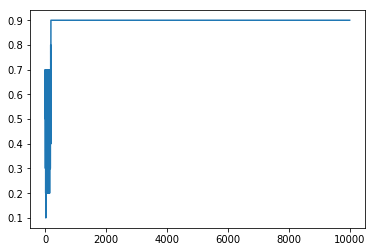

In [17]:
plt.plot(thetas)
plt.show()

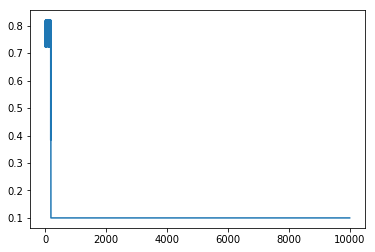

In [15]:
plt.plot(penalties)
plt.show()

#### Ensemble Average

In [13]:
num_exps=100
final_thetas=[]
final_penalties=[]
theta_opt=0.7
max_steps=1000
steps_to_conv=[]

for exp in range(num_exps):
    gg=GooreGame(theta_opt=theta_opt, automata="Tsetlin", N=100, n_voters=100)
    num_steps=0
    while (not gg.converged) and (num_steps<max_steps):
        num_steps=num_steps+1
        gg.step()
    final_thetas.append(gg.theta)
    final_penalties.append(gg.p_pen)
    steps_to_conv.append(num_steps)
    print("exp: "+str(exp)+" theta: "+str(gg.theta)+" p(pen): "+str(gg.p_pen)+" num steps: "+str(num_steps))
    

exp: 0 theta: 0.7 p(pen): 0.1 num steps: 138
exp: 1 theta: 0.7 p(pen): 0.1 num steps: 136
exp: 2 theta: 0.7 p(pen): 0.1 num steps: 135
exp: 3 theta: 0.7 p(pen): 0.1 num steps: 139
exp: 4 theta: 0.7 p(pen): 0.1 num steps: 144
exp: 5 theta: 0.7 p(pen): 0.1 num steps: 145
exp: 6 theta: 0.7 p(pen): 0.1 num steps: 129
exp: 7 theta: 0.7 p(pen): 0.1 num steps: 150
exp: 8 theta: 0.7 p(pen): 0.1 num steps: 128
exp: 9 theta: 0.7 p(pen): 0.1 num steps: 134
exp: 10 theta: 0.7 p(pen): 0.1 num steps: 148
exp: 11 theta: 0.7 p(pen): 0.1 num steps: 134
exp: 12 theta: 0.7 p(pen): 0.1 num steps: 140
exp: 13 theta: 0.7 p(pen): 0.1 num steps: 134
exp: 14 theta: 0.8 p(pen): 0.383147782506 num steps: 540
exp: 15 theta: 0.7 p(pen): 0.1 num steps: 150
exp: 16 theta: 0.7 p(pen): 0.1 num steps: 162
exp: 17 theta: 0.7 p(pen): 0.1 num steps: 131
exp: 18 theta: 0.7 p(pen): 0.1 num steps: 148
exp: 19 theta: 0.7 p(pen): 0.1 num steps: 145
exp: 20 theta: 0.7 p(pen): 0.1 num steps: 132
exp: 21 theta: 0.7 p(pen): 0.1 nu

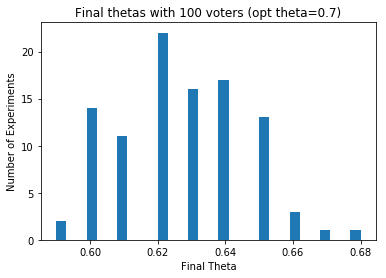

In [12]:
#final_thetas1=final_thetas
plt.hist(final_thetas, bins=30)
plt.title("Final thetas with 100 voters (opt theta=0.7)")
plt.ylabel("Number of Experiments")
plt.xlabel("Final Theta")
plt.savefig("100voters.png")
plt.show()

In [4]:
num_exps=100
final_thetas=[]
final_penalties=[]
theta_opt=0.7
max_steps=1000
steps_to_conv=[]

for exp in range(num_exps):
    gg=GooreGame(theta_opt=theta_opt, automata="Tsetlin", N=100, n_voters=10)
    num_steps=0
    while (not gg.converged) and (num_steps<max_steps):
        num_steps=num_steps+1
        gg.step()
    final_thetas.append(gg.theta)
    final_penalties.append(gg.p_pen)
    steps_to_conv.append(num_steps)
    #print("exp: "+str(exp)+" theta: "+str(gg.theta)+" p(pen): "+str(gg.p_pen)+" num steps: "+str(num_steps))
 

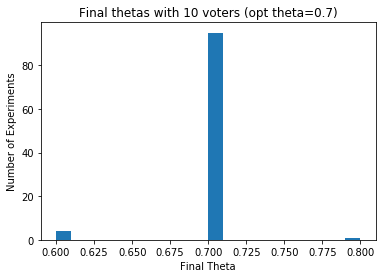

In [9]:
plt.hist(final_thetas, bins=20)
plt.title("Final thetas with 10 voters (opt theta=0.7)")
plt.ylabel("Number of Experiments")
plt.xlabel("Final Theta")
plt.savefig("10voters.png")
plt.show()

### N vs Error in Theta

In [18]:
# for varying N, test with 10 voters, plot distance from mean

test_Ns=np.arange(3, 100, 2)
theta_errs=[]

for N in test_Ns:
    num_exps=100
    final_thetas=[]
    final_penalties=[]
    theta_opt=0.7
    max_steps=1000
    steps_to_conv=[]

    for exp in range(num_exps):
        gg=GooreGame(theta_opt=theta_opt, automata="Tsetlin", N=N, n_voters=10)
        num_steps=0
        while (not gg.converged) and (num_steps<max_steps):
            num_steps=num_steps+1
            gg.step()
        final_thetas.append(gg.theta)
        final_penalties.append(gg.p_pen)
        steps_to_conv.append(num_steps)
    
    theta_errs.append(abs(theta_opt-sum(final_thetas)/len(final_thetas)))
    print("N: "+str(N)+" thetas: "+str(sum(final_thetas)/len(final_thetas)))
     

N: 3 thetas: 0.7000000000000013
N: 5 thetas: 0.7010000000000012
N: 7 thetas: 0.6990000000000013
N: 9 thetas: 0.6990000000000012
N: 11 thetas: 0.7000000000000013
N: 13 thetas: 0.6960000000000012
N: 15 thetas: 0.6980000000000013
N: 17 thetas: 0.7010000000000012
N: 19 thetas: 0.6970000000000013
N: 21 thetas: 0.6960000000000014
N: 23 thetas: 0.6970000000000013
N: 25 thetas: 0.6980000000000011
N: 27 thetas: 0.6960000000000012
N: 29 thetas: 0.6990000000000012
N: 31 thetas: 0.6980000000000013
N: 33 thetas: 0.6940000000000012
N: 35 thetas: 0.6980000000000013
N: 37 thetas: 0.6960000000000012
N: 39 thetas: 0.6970000000000012
N: 41 thetas: 0.6990000000000012
N: 43 thetas: 0.6950000000000013
N: 45 thetas: 0.6950000000000013
N: 47 thetas: 0.6970000000000013
N: 49 thetas: 0.6950000000000013
N: 51 thetas: 0.6960000000000012
N: 53 thetas: 0.6970000000000012
N: 55 thetas: 0.6980000000000013
N: 57 thetas: 0.7020000000000013
N: 59 thetas: 0.6980000000000013
N: 61 thetas: 0.6960000000000011
N: 63 thetas: 

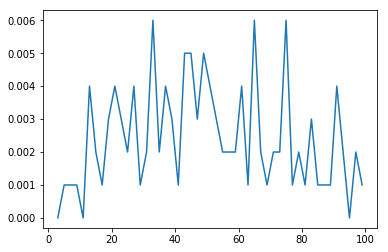

In [19]:
plt.plot(test_Ns, theta_errs)
plt.show()

In [20]:
# for varying N, test with 10 voters, plot distance from mean

test_Ns=np.arange(3, 100, 5)
theta_errs=[]

for N in test_Ns:
    num_exps=100
    final_thetas=[]
    final_penalties=[]
    theta_opt=0.7
    max_steps=1000
    steps_to_conv=[]

    for exp in range(num_exps):
        gg=GooreGame(theta_opt=theta_opt, automata="Tsetlin", N=N, n_voters=100)
        num_steps=0
        while (not gg.converged) and (num_steps<max_steps):
            num_steps=num_steps+1
            gg.step()
        final_thetas.append(gg.theta)
        final_penalties.append(gg.p_pen)
        steps_to_conv.append(num_steps)
    
    theta_errs.append(abs(theta_opt-sum(final_thetas)/len(final_thetas)))
    print("N: "+str(N)+" thetas: "+str(sum(final_thetas)/len(final_thetas)))

N: 3 thetas: 0.564
N: 8 thetas: 0.6373000000000004
N: 13 thetas: 0.6334999999999998
N: 18 thetas: 0.6279999999999999
N: 23 thetas: 0.6262000000000001
N: 28 thetas: 0.6324000000000001
N: 33 thetas: 0.6276
N: 38 thetas: 0.6275000000000001
N: 43 thetas: 0.6271000000000001
N: 48 thetas: 0.6284999999999998
N: 53 thetas: 0.6325
N: 58 thetas: 0.6313999999999999
N: 63 thetas: 0.6298999999999999
N: 68 thetas: 0.6244999999999998
N: 73 thetas: 0.6273000000000001
N: 78 thetas: 0.6285
N: 83 thetas: 0.6304999999999998
N: 88 thetas: 0.6279000000000002
N: 93 thetas: 0.6295000000000001
N: 98 thetas: 0.6312000000000001


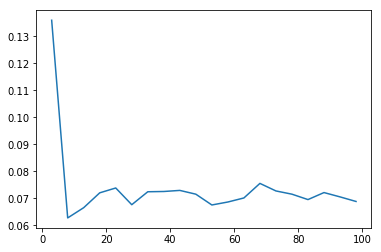

In [21]:
plt.plot(test_Ns, theta_errs)
plt.show()

### Voters vs Error in Theta

In [26]:
# for varying numbers of voters, test with N=20, plot distance from mean

test_num_voters=np.arange(3, 100, 2)
theta_errs=[]

for num_voters in test_num_voters:
    num_exps=100
    final_thetas=[]
    final_penalties=[]
    theta_opt=0.7
    max_steps=1000
    steps_to_conv=[]

    for exp in range(num_exps):
        gg=GooreGame(theta_opt=theta_opt, automata="Tsetlin", N=10, n_voters=num_voters)
        num_steps=0
        while (not gg.converged) and (num_steps<max_steps):
            num_steps=num_steps+1
            gg.step()
        final_thetas.append(gg.theta)
        final_penalties.append(gg.p_pen)
        steps_to_conv.append(num_steps)
    
    theta_errs.append(abs(theta_opt-sum(final_thetas)/len(final_thetas)))
    print("num_voters: "+str(num_voters)+" thetas: "+str(sum(final_thetas)/len(final_thetas)))

num_voters: 3 thetas: 0.666666666667
num_voters: 5 thetas: 0.678
num_voters: 7 thetas: 0.714285714286
num_voters: 9 thetas: 0.682222222222
num_voters: 11 thetas: 0.692727272727
num_voters: 13 thetas: 0.690769230769
num_voters: 15 thetas: 0.690666666667
num_voters: 17 thetas: 0.681176470588
num_voters: 19 thetas: 0.680526315789
num_voters: 21 thetas: 0.681428571429
num_voters: 23 thetas: 0.679565217391
num_voters: 25 thetas: 0.6748
num_voters: 27 thetas: 0.677037037037
num_voters: 29 thetas: 0.669655172414
num_voters: 31 thetas: 0.665161290323
num_voters: 33 thetas: 0.665757575758
num_voters: 35 thetas: 0.667428571429
num_voters: 37 thetas: 0.663513513514
num_voters: 39 thetas: 0.661025641026
num_voters: 41 thetas: 0.654390243902
num_voters: 43 thetas: 0.65488372093
num_voters: 45 thetas: 0.658
num_voters: 47 thetas: 0.651063829787
num_voters: 49 thetas: 0.647346938776
num_voters: 51 thetas: 0.646666666667
num_voters: 53 thetas: 0.650377358491
num_voters: 55 thetas: 0.646545454545
num_v

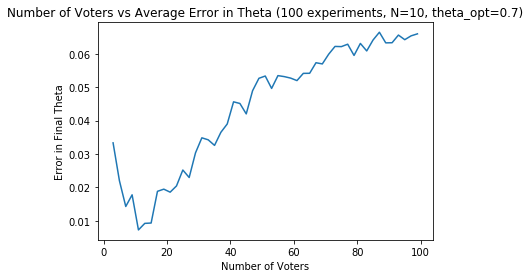

In [27]:
plt.plot(test_num_voters, theta_errs)
plt.title("Number of Voters vs Average Error in Theta (100 experiments, N=10, theta_opt=0.7)")
plt.xlabel("Number of Voters")
plt.ylabel("Error in Final Theta")
plt.savefig("numvotervserror07.png")
plt.show()

In [24]:
# for varying N, test with 10 voters, plot distance from mean
# generate a new theta opt for each experiment

test_num_voters=np.arange(3, 100, 2)
theta_errs=[]

for num_voters in test_num_voters:
    num_exps=100
    final_theta_errors=[]
    final_penalties=[]
    #theta_opt=0.7
    max_steps=10000
    steps_to_conv=[]

    for exp in range(num_exps):
        theta_opt=random.uniform(0,1)
        gg=GooreGame(theta_opt=theta_opt, automata="Tsetlin", N=10, n_voters=num_voters)
        num_steps=0
        while (not gg.converged) and (num_steps<max_steps):
            num_steps=num_steps+1
            gg.step()
        final_theta_errors.append(abs(gg.theta-theta_opt))
        final_penalties.append(gg.p_pen)
        steps_to_conv.append(num_steps)
    
    theta_errs.append(sum(final_theta_errors)/len(final_theta_errors))
    print("num_voters: "+str(num_voters)+" theta errors: "+str(sum(final_theta_errors)/len(final_theta_errors)))

num_voters: 3 theta errors: 0.141632140246
num_voters: 5 theta errors: 0.0515109070483
num_voters: 7 theta errors: 0.0413548665256
num_voters: 9 theta errors: 0.0323796253184
num_voters: 11 theta errors: 0.0442462623688
num_voters: 13 theta errors: 0.0555105640614
num_voters: 15 theta errors: 0.0632300085518
num_voters: 17 theta errors: 0.0976348590508
num_voters: 19 theta errors: 0.0878071628045
num_voters: 21 theta errors: 0.153552979196
num_voters: 23 theta errors: 0.0977412863826
num_voters: 25 theta errors: 0.115787511474
num_voters: 27 theta errors: 0.12979589468
num_voters: 29 theta errors: 0.123330641849
num_voters: 31 theta errors: 0.145478249805
num_voters: 33 theta errors: 0.150564634648
num_voters: 35 theta errors: 0.138455386972
num_voters: 37 theta errors: 0.217173850701
num_voters: 39 theta errors: 0.164994228786
num_voters: 41 theta errors: 0.159381158269
num_voters: 43 theta errors: 0.186737625179
num_voters: 45 theta errors: 0.16114252429
num_voters: 47 theta errors: 

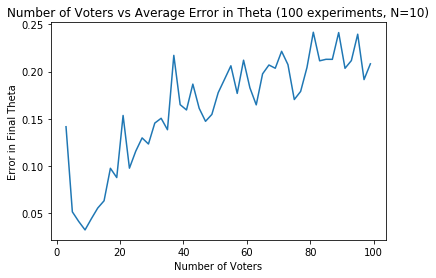

In [25]:
plt.plot(test_num_voters, theta_errs)
plt.title("Number of Voters vs Average Error in Theta (100 experiments, N=10)")
plt.xlabel("Number of Voters")
plt.ylabel("Error in Final Theta")
plt.savefig("numvotervserror.png")
plt.show()

### Lri

#### Single Experiment

In [34]:
# run to convergence
gg=GooreGame(theta_opt=0.4, automata="Lri", n_voters=10)
thetas=[]
num_steps=5000
penalties=[]
for step in range(num_steps):
    gg.step()
    thetas.append(gg.theta)
    penalties.append(gg.p_pen)

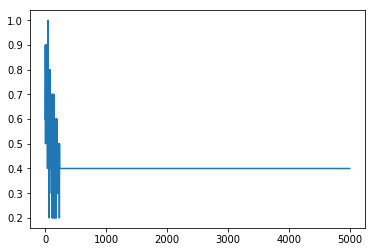

In [35]:
plt.plot(thetas)
plt.show()

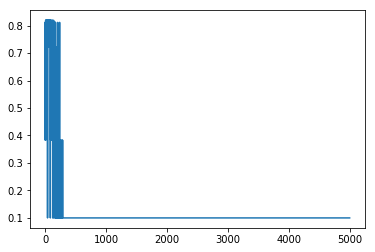

In [36]:
plt.plot(rewards)
plt.show()

In [37]:
gg.voters

[P: [3.299749884844484e-203, 1.0], Action: 1, kr: 0.9,
 P: [8.664860585169083e-202, 1.0], Action: 1, kr: 0.9,
 P: [9.628349890793106e-200, 1.0], Action: 1, kr: 0.9,
 P: [1.0, 2.2508121451152834e-198], Action: 0, kr: 0.9,
 P: [1.0, 3.056843671468844e-197], Action: 0, kr: 0.9,
 P: [1.0, 1.7629846734366638e-200], Action: 0, kr: 0.9,
 P: [1.0, 8.753507822101946e-199], Action: 0, kr: 0.9,
 P: [6.707748476589298e-199, 1.0], Action: 1, kr: 0.9,
 P: [1.0, 2.7477642492084473e-199], Action: 0, kr: 0.9,
 P: [1.0, 6.955288520153365e-203], Action: 0, kr: 0.9]

#### Ensemble Average

In [16]:
num_exps=100
final_thetas_lri=[]
final_penalties_lri=[]
theta_opt=0.7

for exp in range(num_exps):
    gg=GooreGame(theta_opt=theta_opt, automata="Lri", n_voters=100)
    num_steps=1000
    for step in range(num_steps):
        gg.step()
    final_thetas_lri.append(gg.theta)
    final_penalties_lri.append(gg.p_pen)

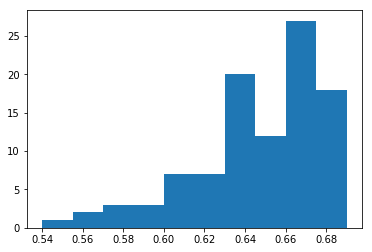

In [17]:
plt.hist(final_thetas_lri)
plt.show()

In [18]:
gg.voters

[P: [0.0001, 0.9999], Action: 1, kr: 0.9,
 P: [0.0001, 0.9999], Action: 1, kr: 0.9,
 P: [0.0001, 0.9999], Action: 1, kr: 0.9,
 P: [0.0001, 0.9999], Action: 1, kr: 0.9,
 P: [0.0001, 0.9999], Action: 1, kr: 0.9,
 P: [0.9999, 0.0001], Action: 0, kr: 0.9,
 P: [0.0001, 0.9999], Action: 1, kr: 0.9,
 P: [0.6838324545857581, 0.3161675454142419], Action: 0, kr: 0.9,
 P: [0.0001, 0.9999], Action: 1, kr: 0.9,
 P: [0.0001, 0.9999], Action: 1, kr: 0.9,
 P: [0.0001, 0.9999], Action: 1, kr: 0.9,
 P: [0.0001, 0.9999], Action: 1, kr: 0.9,
 P: [0.0001, 0.9999], Action: 1, kr: 0.9,
 P: [0.0001, 0.9999], Action: 1, kr: 0.9,
 P: [0.0001, 0.9999], Action: 1, kr: 0.9,
 P: [0.0001, 0.9999], Action: 1, kr: 0.9,
 P: [0.0001, 0.9999], Action: 1, kr: 0.9,
 P: [0.9999, 0.0001], Action: 0, kr: 0.9,
 P: [0.9999, 0.0001], Action: 0, kr: 0.9,
 P: [0.0001, 0.9999], Action: 1, kr: 0.9,
 P: [0.0001, 0.9999], Action: 1, kr: 0.9,
 P: [0.9999, 0.0001], Action: 0, kr: 0.9,
 P: [0.9999, 0.0001], Action: 0, kr: 0.9,
 P: [0.000

In [33]:
p_opt_theta=sum([theta==theta_opt for theta in final_thetas_lri])/len(final_thetas_lri)
print("Percent of experiments found optimal theta: "+str(p_opt_theta))
print("Percent of reward for theta opt: "+str(gg.g(theta_opt)))

Percent of experiments found optimal theta: 1.0
Percent of reward for theta opt: 0.9


In [19]:
num_exps=100
final_thetas_lri2=[]
final_penalties_lri2=[]
theta_opt=0.3

for exp in range(num_exps):
    gg2=GooreGame(theta_opt=theta_opt, automata="Lri", n_voters=100)
    num_steps=1000
    for step in range(num_steps):
        gg2.step()
    final_thetas_lri2.append(gg2.theta)
    final_penalties_lri2.append(sum(gg2.rewards))

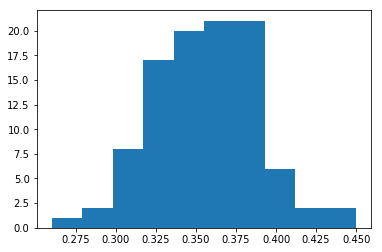

In [20]:
plt.hist(final_thetas_lri2)
plt.show()

In [26]:
num_exps=100
final_thetas_lri3=[]
final_penalties_lri3=[]
theta_opt=0.5

for exp in range(num_exps):
    gg3=GooreGame(theta_opt=theta_opt, automata="Lri", n_voters=100)
    num_steps=1000
    for step in range(num_steps):
        gg3.step()
    final_thetas_lri3.append(gg3.theta)
    final_penalties_lri3.append(sum(gg3.rewards))

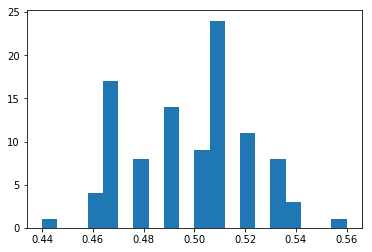

In [38]:
plt.hist(final_thetas_lri3, bins=20)
plt.show()

In [40]:
sum(final_thetas_lri3)

49.850000000000009

### Bimodal

#### Bimodal Function

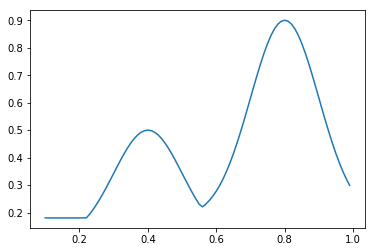

In [11]:
gg=GooreGame(theta_opt=0.8, automata="Lri", n_voters=10, g_mod="bimod")

thetas=np.arange(0.1, 1, 0.01)
bimod_gthetas=[gg.bimod_g(theta) for theta in thetas]

plt.plot(thetas, bimod_gthetas)
plt.show()

#### Tsetlin Simulations with Ensemble Average

In [43]:
num_exps=100
final_thetas=[]
final_penalties=[]
theta_opt=0.8

for exp in range(num_exps):
    gg=GooreGame(theta_opt=theta_opt, automata="Tsetlin", N=100, n_voters=100, g_mod="bimod")
    num_steps=1000
    for step in range(num_steps):
        gg.step()
    final_thetas.append(gg.theta)
    final_penalties.append(sum(gg.rewards))

In [44]:
p_opt_theta=sum([theta==theta_opt for theta in final_thetas])/len(final_thetas)
print("Percent of experiments found optimal theta: "+str(p_opt_theta))
print("Percent of reward for theta opt: "+str(gg.g(theta_opt)))

Percent of experiments found optimal theta: 0.01
Percent of reward for theta opt: 0.9


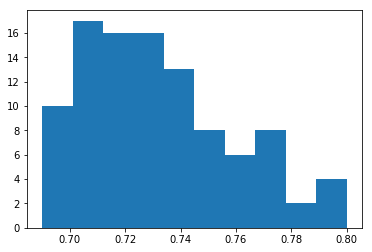

In [45]:
plt.hist(final_thetas)
plt.show()

In [40]:
p_opt_theta=sum([theta==theta_opt/2 for theta in final_thetas])/len(final_thetas)
print("Percent of experiments found second mode theta: "+str(p_opt_theta))
print("Percent of reward for second mode theta: "+str(gg.g(theta_opt/2)))

Percent of experiments found second mode theta: 0.0
Percent of reward for second mode theta: 0.180622991362


#### Lri simulations with ensemble average

In [46]:
num_exps=100
final_thetas=[]
final_penalties=[]
theta_opt=0.8

for exp in range(num_exps):
    gg=GooreGame(theta_opt=theta_opt, automata="Lri", N=100, n_voters=100, g_mod="bimod")
    num_steps=1000
    for step in range(num_steps):
        gg.step()
    final_thetas.append(gg.theta)
    final_penalties.append(sum(gg.rewards))
    
p_opt_theta=sum([theta==theta_opt for theta in final_thetas])/len(final_thetas)
print("Percent of experiments found optimal theta: "+str(p_opt_theta))
print("Percent of reward for theta opt: "+str(gg.g(theta_opt)))

Percent of experiments found optimal theta: 0.0
Percent of reward for theta opt: 0.9


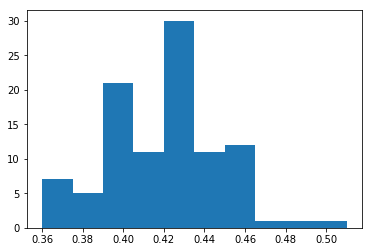

In [47]:
plt.hist(final_thetas)
plt.show()

In [ ]:
p_opt_theta=sum([theta==theta_opt/2 for theta in final_thetas])/len(final_thetas)
print("Percent of experiments found second mode theta: "+str(p_opt_theta))
print("Percent of reward for second mode theta: "+str(gg.g(theta_opt/2)))